In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:

dataset = pd.read_csv('../data/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
dataset[['region']].value_counts()

region   
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [13]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

region_encoder = LabelEncoder()
region_encoded = region_encoder.fit_transform(dataset['region'])
dataset['region'] = region_encoded
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [22]:
sex_encoder = LabelEncoder()
sex_encoded = sex_encoder.fit_transform(dataset['sex'])
dataset['sex'] = sex_encoded
dataset.head()
smoker_encoder = LabelEncoder()
smoker_encoded = smoker_encoder.fit_transform(dataset['smoker'])
dataset['smoker'] = smoker_encoded
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [26]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns='charges', axis=1)
y = dataset['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Display first 10 predictions
print(y_pred[:10])

[ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309]


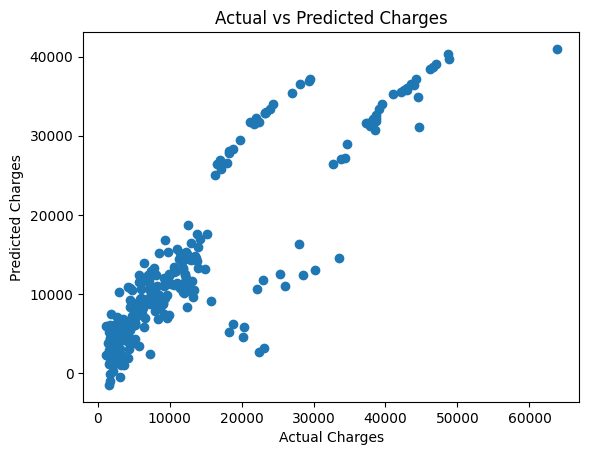

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4186.508898366437
33635210.431178436
0.7833463107364537


In [33]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

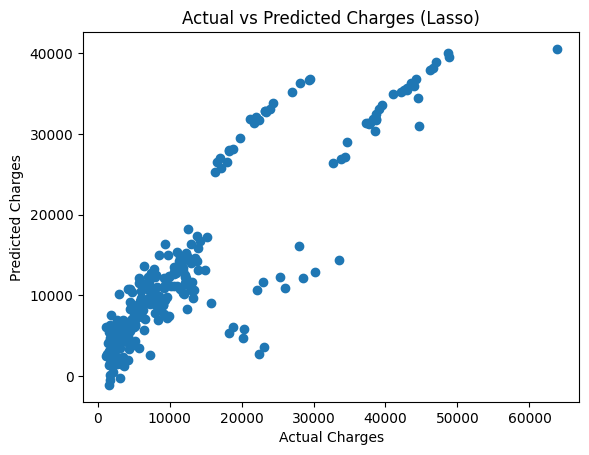

In [34]:
plt.scatter(y_test, y_lasso_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Lasso)")
plt.show()

In [35]:
print(mean_absolute_error(y_test,y_lasso_pred))
print(mean_squared_error(y_test,y_lasso_pred))  
print(r2_score(y_test,y_lasso_pred))

4194.248135620977
33853195.13725525
0.7819422109800034


In [36]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

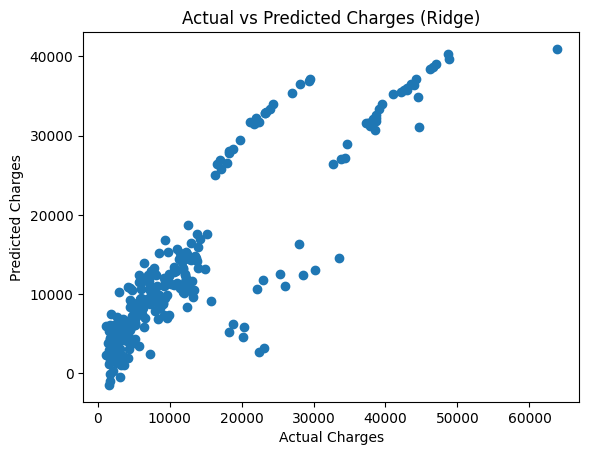

In [37]:
plt.scatter(y_test, y_ridge_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Ridge)")
plt.show()

In [39]:
print(mean_absolute_error(y_test,y_ridge_pred))
print(mean_squared_error(y_test,y_ridge_pred))
print(r2_score(y_test,y_ridge_pred))

4187.971685428868
33641818.58882111
0.783303745766169


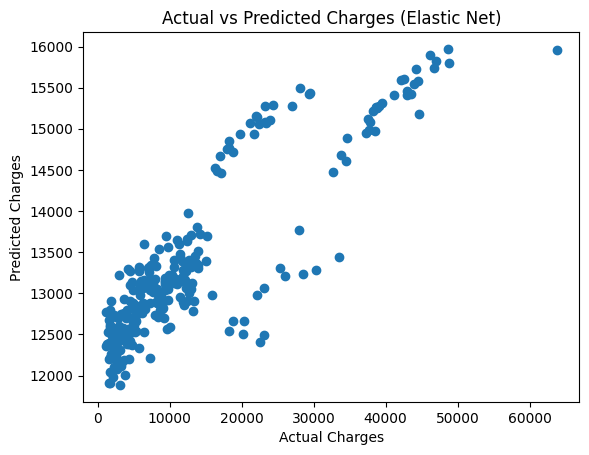

In [54]:
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(cv=10)
elastic_net.fit(X_train, y_train)
y_elastic_net_pred = elastic_net.predict(X_test)
plt.scatter(y_test, y_elastic_net_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Elastic Net)")
plt.show()

In [42]:
print(y_elastic_net_pred[:10])

[12818.90989209 12657.0681637  15428.08721283 13043.46434343
 14686.03881659 13266.71833869 11983.33338871 13717.66452672
 12000.69188676 13222.51298065]


In [43]:
print(y_test[:10])

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
1312     4536.25900
899      2117.33885
752     14210.53595
1286     3732.62510
707     10264.44210
Name: charges, dtype: float64


In [44]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [55]:
print(mean_absolute_error(y_test,y_elastic_net_pred))
print(mean_squared_error(y_test,y_elastic_net_pred))
print(r2_score(y_test,y_elastic_net_pred))

8870.579156385056
133873922.47026227
0.13768105424193988


In [56]:
import pickle
# Save the model
with open('../model/insurance_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)
    
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)    